In [1]:
import netCDF4 as nc
import xarray as xr    
import numpy as np
import glob, os

In [2]:
path_data = '/scratch/m/m300878/retrieve/ocean_era51h_r2b8_19074-AMK_dm_20100101T000000Z.nc'

In [3]:
ds = xr.open_dataset(path_data)
ds

<xarray.Dataset>
Dimensions:    (time: 31, ncells: 3729001, vertices: 3, depth: 128, depth_2: 129)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-01-31
    clon       (ncells) float32 ...
    clat       (ncells) float32 ...
  * depth      (depth) float64 5.5 15.5 24.0 ... 5.862e+03 6.062e+03 6.262e+03
  * depth_2    (depth_2) float64 0.0 11.0 20.0 ... 5.962e+03 6.162e+03 6.362e+03
Dimensions without coordinates: ncells, vertices
Data variables:
    clon_bnds  (ncells, vertices) float32 ...
    clat_bnds  (ncells, vertices) float32 ...
    zos        (time, ncells) float32 ...
    to         (time, depth, ncells) float32 ...
    so         (time, depth, ncells) float32 ...
    u          (time, depth, ncells) float32 ...
    v          (time, depth, ncells) float32 ...
    w          (time, depth_2, ncells) float32 ...
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    number_of_grid_used:  42
    uuidOfHGrid:          66c2eb2c-9bd9-11e8-97bc-e1d6091d8653
    history:              /work/mh0033/m211054/projects/icon/icon-oes-1.0.08/...
    source:               git@git.mpimet.mpg.de:icon-oes.git@7ff40d35302165d2...
    institution:          Max Planck Institute for Meteorology
    Conventions:          CF-1.6
    title:                ICON simulation
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m10144 (Linux 2.6.32-696....

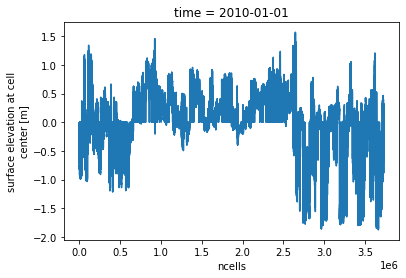

In [4]:
ds.isel(time=0).zos.plot()

In [5]:
zos = ds.zos

In [2]:
path_data = '/scratch/m/m300878/retrieve/'
search_str = f'ocean*.nc' 
flist      = np.array(glob.glob(path_data+search_str))
flist.sort()

In [3]:
flist

array(['/scratch/m/m300878/retrieve/ocean_era51h_r2b8_19074-AMK_dm_20100101T000000Z.nc',
       '/scratch/m/m300878/retrieve/ocean_era51h_r2b8_19074-AMK_dm_20100201T000000Z.nc',
       '/scratch/m/m300878/retrieve/ocean_era51h_r2b8_19074-AMK_dm_20100301T000000Z.nc'],
      dtype='<U78')

In [4]:
da = xr.open_mfdataset(flist, combine='nested', concat_dim='time', parallel=True, chunks=dict(time=1))
da


<xarray.Dataset>
Dimensions:    (time: 90, ncells: 3729001, vertices: 3, depth: 128, depth_2: 129)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
    clon       (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat       (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
  * depth      (depth) float64 5.5 15.5 24.0 ... 5.862e+03 6.062e+03 6.262e+03
  * depth_2    (depth_2) float64 0.0 11.0 20.0 ... 5.962e+03 6.162e+03 6.362e+03
Dimensions without coordinates: ncells, vertices
Data variables:
    clon_bnds  (time, ncells, vertices) float32 dask.array<chunksize=(31, 3729001, 3), meta=np.ndarray>
    clat_bnds  (time, ncells, vertices) float32 dask.array<chunksize=(31, 3729001, 3), meta=np.ndarray>
    zos        (time, ncells) float32 dask.array<chunksize=(1, 3729001), meta=np.ndarray>
    to         (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    so         (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    u          (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    v          (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    w          (time, depth_2, ncells) float32 dask.array<chunksize=(1, 129, 3729001), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    number_of_grid_used:  42
    uuidOfHGrid:          66c2eb2c-9bd9-11e8-97bc-e1d6091d8653
    history:              /work/mh0033/m211054/projects/icon/icon-oes-1.0.08/...
    source:               git@git.mpimet.mpg.de:icon-oes.git@7ff40d35302165d2...
    institution:          Max Planck Institute for Meteorology
    Conventions:          CF-1.6
    title:                ICON simulation
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m10144 (Linux 2.6.32-696....

In [5]:
sst = da.isel(depth=0).to

In [6]:
zos = da.zos

<xarray.DataArray 'to' (time: 90, ncells: 3729001)>
dask.array<getitem, shape=(90, 3729001), dtype=float32, chunksize=(1, 3729001), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
    clon     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    depth    float64 5.5
Dimensions without coordinates: ncells
Attributes:
    standard_name:                sea_water_potential_temperature
    long_name:                    sea water potential temperature
    units:                        deg C
    code:                         2
    CDI_grid_type:                unstructured
    number_of_grid_in_reference:  1

In [13]:
ds = da[['to','zos']]
ds = ds.isel(depth=0)
ds

<xarray.Dataset>
Dimensions:  (time: 90, ncells: 3729001)
Coordinates:
  * time     (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
    clon     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat     (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    depth    float64 5.5
Dimensions without coordinates: ncells
Data variables:
    to       (time, ncells) float32 dask.array<chunksize=(1, 3729001), meta=np.ndarray>
    zos      (time, ncells) float32 dask.array<chunksize=(1, 3729001), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    number_of_grid_used:  42
    uuidOfHGrid:          66c2eb2c-9bd9-11e8-97bc-e1d6091d8653
    history:              /work/mh0033/m211054/projects/icon/icon-oes-1.0.08/...
    source:               git@git.mpimet.mpg.de:icon-oes.git@7ff40d35302165d2...
    institution:          Max Planck Institute for Meteorology
    Conventions:          CF-1.6
    title:                ICON simulation
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m10144 (Linux 2.6.32-696....

In [14]:
path = '/work/mh0033/m300878/r2b8/mod_eval_data/sst_ssh.nc'
ds.to_netcdf(path)

In [11]:
da

<xarray.Dataset>
Dimensions:    (time: 90, ncells: 3729001, vertices: 3, depth: 128, depth_2: 129)
Coordinates:
  * time       (time) datetime64[ns] 2010-01-01 2010-01-02 ... 2010-03-31
    clon       (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
    clat       (ncells) float32 dask.array<chunksize=(3729001,), meta=np.ndarray>
  * depth      (depth) float64 5.5 15.5 24.0 ... 5.862e+03 6.062e+03 6.262e+03
  * depth_2    (depth_2) float64 0.0 11.0 20.0 ... 5.962e+03 6.162e+03 6.362e+03
Dimensions without coordinates: ncells, vertices
Data variables:
    clon_bnds  (time, ncells, vertices) float32 dask.array<chunksize=(31, 3729001, 3), meta=np.ndarray>
    clat_bnds  (time, ncells, vertices) float32 dask.array<chunksize=(31, 3729001, 3), meta=np.ndarray>
    zos        (time, ncells) float32 dask.array<chunksize=(1, 3729001), meta=np.ndarray>
    to         (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    so         (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    u          (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    v          (time, depth, ncells) float32 dask.array<chunksize=(1, 128, 3729001), meta=np.ndarray>
    w          (time, depth_2, ncells) float32 dask.array<chunksize=(1, 129, 3729001), meta=np.ndarray>
Attributes:
    CDI:                  Climate Data Interface version 1.8.0rc7 (http://mpi...
    number_of_grid_used:  42
    uuidOfHGrid:          66c2eb2c-9bd9-11e8-97bc-e1d6091d8653
    history:              /work/mh0033/m211054/projects/icon/icon-oes-1.0.08/...
    source:               git@git.mpimet.mpg.de:icon-oes.git@7ff40d35302165d2...
    institution:          Max Planck Institute for Meteorology
    Conventions:          CF-1.6
    title:                ICON simulation
    references:           see MPIM/DWD publications
    comment:              Helmuth Haak (m211054) on m10144 (Linux 2.6.32-696....